In [1]:
import predict as prd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#data = prd.prepare_data('AAPL.csv', ['timestamp', 'close'])
data = prd.prepare_data('EBAY', distant=True, api_key='IEB6OPAXVXKW0L6B')
data_copy = data.copy()
startAt = 1000
stopAt = len(data)

data_copy['Close'] = data_copy['Close'].diff(periods=1)
data_copy.drop([0], inplace=True)

In [4]:
from fastai.tabular import add_datepart
add_datepart(data_copy, 'Date')
data_copy.drop('Elapsed', axis=1, inplace=True)

data_copy['mon_fri'] = 0
data_copy['mon_fri'].mask(data_copy['Dayofweek'].isin([0,4]), 1, inplace=True)
data_copy['mon_fri'].where(data_copy['Dayofweek'].isin([0,4]), 0, inplace=True)

train = data_copy[:startAt]
valid = data_copy[startAt:stopAt]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [5]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(criterion='mae', max_depth=None, random_state=0, n_estimators=100)
model.fit(x_train, y_train)
predictions = model.predict(x_valid)

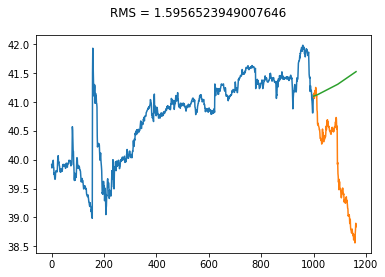

In [6]:
prd.plot_predictions(data, predictions, startAt, diff_order=1, print_rms=True)